In [98]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from task_one import *   
from load_data import *

In [100]:
# Load environment variables from .env file
load_dotenv()
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [101]:
# Define your SQL query
query = "SELECT * FROM xdr_data;" 
data = load_data_from_postgres(query)
if data is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


c:\Users\Tsega KisPay\Documents\GitHub\TellCo-Telecom-Analytics-Dashboard\scripts\load_data.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [102]:
# Display basic information about the dataset
display_data_info(data)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Av

In [103]:
# Task 1.0: Identify top 10 handsets and manufacturers
top_10_handsets = identify_top_10_handsets(data)


Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [104]:
# Task 1.1: Identify top 3 handset manufacturers
top_3_manufacturers = identify_top_3_manufacturers(data)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [105]:
# Task 1.2: Identify the top 5 handsets per top 3 manufacturers
top_5_handsets_per_manufacturer = top_5_handsets_per_manufacturer(data, top_3_manufacturers)


Top 5 Handsets per Top 3 Manufacturers:

Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [106]:
# Aggregate User Behavior
user_behavior = aggregate_user_behavior(data)
print("\nAggregated User Behavior:")
print(user_behavior.head()) 


Aggregated User Behavior:
               Dur. (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
MSISDN/Number                                                                
3.360100e+10    116720.0                     37.0                     39.0   
3.360100e+10    181230.0                     48.0                     51.0   
3.360100e+10    134969.0                     48.0                     49.0   
3.360101e+10     49878.0                    204.0                     44.0   
3.360101e+10     37104.0                  40395.0                  16449.0   

               Total DL (Bytes)  Total UL (Bytes)  Total Data Volume  
MSISDN/Number                                                         
3.360100e+10       8.426375e+08        36053108.0       8.786906e+08  
3.360100e+10       1.207552e+08        36104459.0       1.568596e+08  
3.360100e+10       5.566597e+08        39306820.0       5.959665e+08  
3.360101e+10       4.019932e+08        20327526.0       4.223207e+08  


In [107]:
# Handle Missing Values
data = handle_missing_values(data)
print("\nData After Handling Missing Values:")
print(data.head())


Data After Handling Missing Values:
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...      

In [108]:
# Create Deciles
user_behavior = create_deciles(user_behavior)
print("\nUser Behavior with Deciles:")
print(user_behavior.head()) 


User Behavior with Deciles:
               Dur. (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
MSISDN/Number                                                                
3.360100e+10    116720.0                     37.0                     39.0   
3.360100e+10    181230.0                     48.0                     51.0   
3.360100e+10    134969.0                     48.0                     49.0   
3.360101e+10     49878.0                    204.0                     44.0   
3.360101e+10     37104.0                  40395.0                  16449.0   

               Total DL (Bytes)  Total UL (Bytes)  Total Data Volume  Decile  
MSISDN/Number                                                                 
3.360100e+10       8.426375e+08        36053108.0       8.786906e+08       5  
3.360100e+10       1.207552e+08        36104459.0       1.568596e+08       7  
3.360100e+10       5.566597e+08        39306820.0       5.959665e+08       6  
3.360101e+10       4.019932e+

In [109]:
# Perform univariate analysis on user behavior data
univariate_analysis(user_behavior)


Dispersion Parameters:
Dur. (ms):
  Variance: 34729228750.48031
  Standard Deviation: 186357.79766481547
Avg Bearer TP DL (kbps):
  Variance: 1407070466.915728
  Standard Deviation: 37510.937963689044
Avg Bearer TP UL (kbps):
  Variance: 49855024.65772084
  Standard Deviation: 7060.809065377766
Total DL (Bytes):
  Variance: 2.1580938083648688e+17
  Standard Deviation: 464552882.7124926
Total UL (Bytes):
  Variance: 1271456086668827.2
  Standard Deviation: 35657482.89866837
Total Data Volume:
  Variance: 2.4113363151528886e+17
  Standard Deviation: 491053593.322856
Decile:
  Variance: 8.279407598815762
  Standard Deviation: 2.8773959753248706


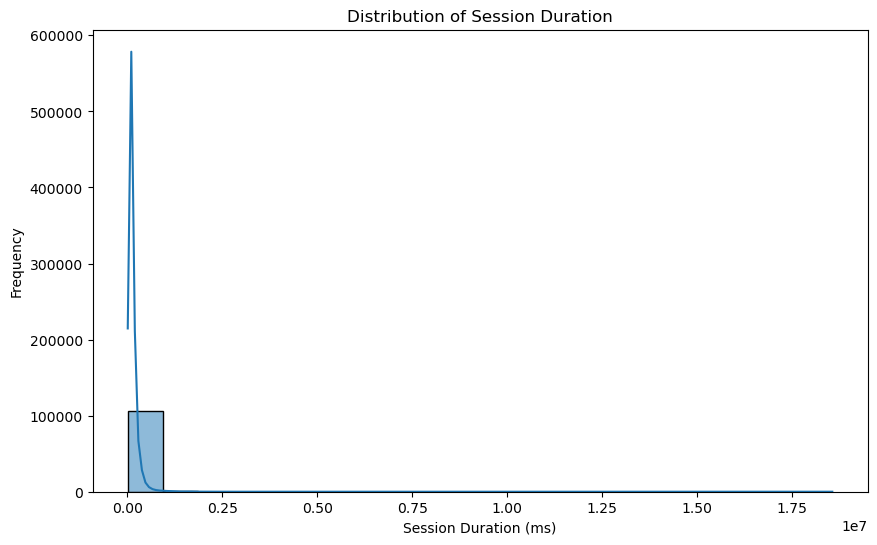

In [110]:
# Plot session duration distribution
plot_session_duration_distribution(user_behavior)

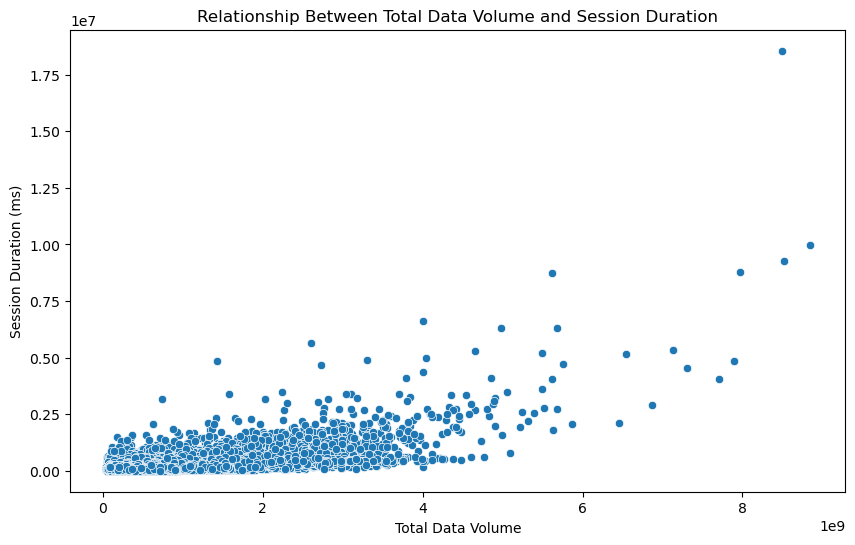

In [111]:
# Perform bivariate analysis on user behavior data
bivariate_analysis(user_behavior)

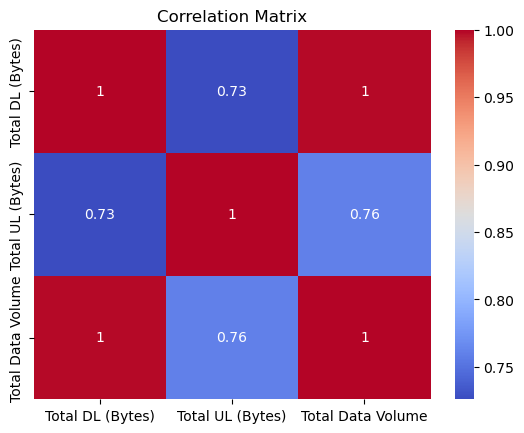

In [112]:
# Plot correlation matrix
plot_correlation_matrix(user_behavior)



PCA Explained Variance Ratio:
[0.73849374 0.17416313]


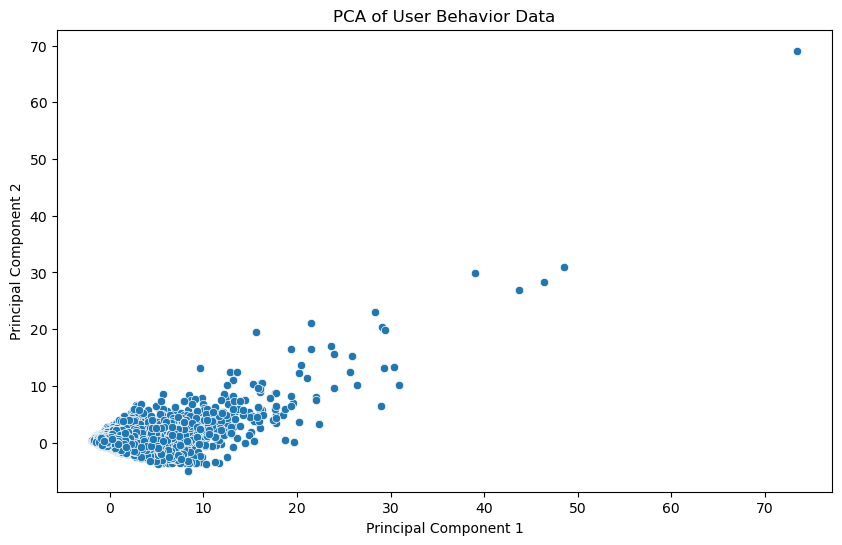

In [113]:
# Perform PCA
perform_pca(user_behavior)